**20L-1360**

**Saadan Atif**

**BDS-8A**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Lambda
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Layer
import keras

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [4]:
# Scaling data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hotencoding of target variables
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [5]:
vgg16 = Sequential()

# Block 1
vgg16.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
vgg16.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
vgg16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
vgg16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg16.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg16.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
vgg16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fully connected layers
vgg16.add(Flatten())
vgg16.add(Dense(4096, activation='relu'))
vgg16.add(Dense(4096, activation='relu'))
vgg16.add(Dense(10, activation='softmax'))  # Assuming 1000 classes for ImageNet

# Print model summary
vgg16.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                   

In [6]:
vgg16.compile(
         optimizer=keras.optimizers.Adam(learning_rate=1e-4),
         loss='categorical_crossentropy',
         metrics=['accuracy'])

In [28]:
import copy
train_datagen = keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = copy.deepcopy(train_datagen)

test_generator = test_datagen.flow(X_test, y_cat_test, batch_size=32)
train_generator = train_datagen.flow(X_train, y_cat_train, batch_size=32)

In [8]:
history = vgg16.fit(train_generator,
                    epochs=50,
                    steps_per_epoch=1500,
                    validation_data=(X_test, y_cat_test),
                    shuffle=True,)

Epoch 1/50
1500/1500 [==============================] - 66s 38ms/step - loss: 1.9452 - accuracy: 0.2152 - val_loss: 1.7282 - val_accuracy: 0.3173
Epoch 2/50
1500/1500 [==============================] - 56s 37ms/step - loss: 1.5739 - accuracy: 0.3911 - val_loss: 1.3730 - val_accuracy: 0.4895
Epoch 3/50
1500/1500 [==============================] - 56s 37ms/step - loss: 1.3155 - accuracy: 0.5134 - val_loss: 1.2023 - val_accuracy: 0.5606
Epoch 4/50
1500/1500 [==============================] - 56s 37ms/step - loss: 1.1129 - accuracy: 0.6044 - val_loss: 1.0073 - val_accuracy: 0.6462
Epoch 5/50
1500/1500 [==============================] - 56s 37ms/step - loss: 0.9566 - accuracy: 0.6643 - val_loss: 0.9107 - val_accuracy: 0.6771
Epoch 6/50
1500/1500 [==============================] - 56s 38ms/step - loss: 0.8424 - accuracy: 0.7082 - val_loss: 0.8205 - val_accuracy: 0.7206
Epoch 7/50
1500/1500 [==============================] - 56s 38ms/step - loss: 0.7668 - accuracy: 0.7358 - val_loss: 0.8939 -

In [9]:
from keras.models import load_model

vgg16.save('vgg16_model_.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Performance Evaluation**

In [10]:
print(f"Training Accuracy: {history.history['accuracy'][-1]}")

Training Accuracy: 0.9680518507957458


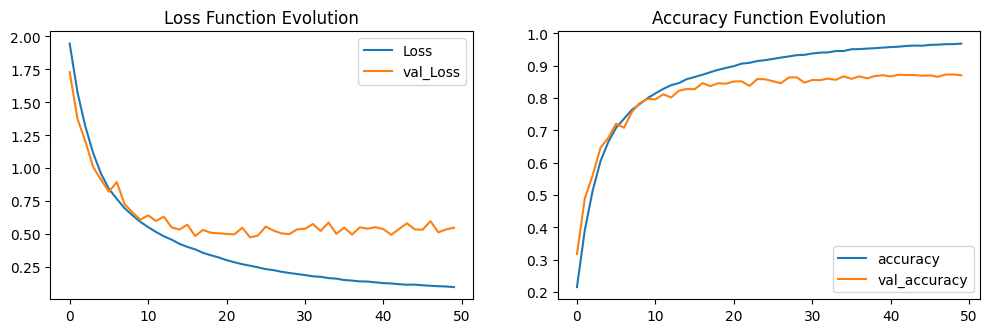

In [11]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

In [12]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 3s 9ms/step - loss: 0.5474 - accuracy: 0.8703
Test Accuracy : 87.03%
313/313 [==============================] - 2s 7ms/step


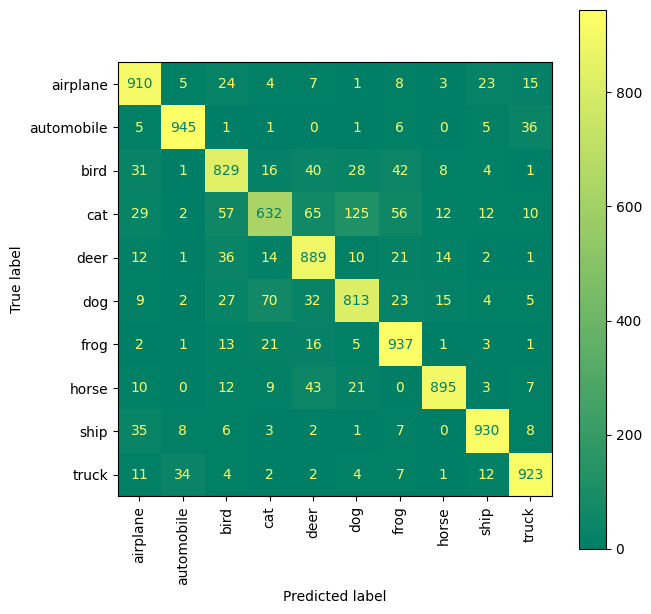

In [14]:
evaluation = vgg16.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = vgg16.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

fig, ax = plt.subplots(figsize=(7, 7))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      1000
           1       0.95      0.94      0.95      1000
           2       0.82      0.83      0.83      1000
           3       0.82      0.63      0.71      1000
           4       0.81      0.89      0.85      1000
           5       0.81      0.81      0.81      1000
           6       0.85      0.94      0.89      1000
           7       0.94      0.90      0.92      1000
           8       0.93      0.93      0.93      1000
           9       0.92      0.92      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# **TOP 1 and TOP 5 error**

In [29]:
# Make predictions on the test set
predictions = vgg16.predict(test_generator)

# Calculate Top-1 and Top-5 errors
top1_error = 0
top5_error = 0
total_samples = len(y_test)

for i in range(total_samples):
    true_label = y_test[i]
    predicted_probs = predictions[i]
    top_5_predicted_classes = predicted_probs.argsort()[-5:][::-1]  # Get indices of top 5 predicted classes

    if true_label == top_5_predicted_classes[0]:
        top1_error += 1

    if true_label not in top_5_predicted_classes:
        top5_error += 1

top1_error_percent = (top1_error / total_samples) * 100
top5_error_percent = (top5_error / total_samples) * 100

print("Top-1 Error: {:.2f}%".format(top1_error_percent))
print("Top-5 Error: {:.2f}%".format(top5_error_percent))


313/313 [==============================] - 6s 18ms/step
Top-1 Error: 10.10%
Top-5 Error: 49.40%


# **Testing Model**

 Image 999 is [8]
1/1 [==============================] - 0s 42ms/step
The model predict that image 999 label is 8(ship)


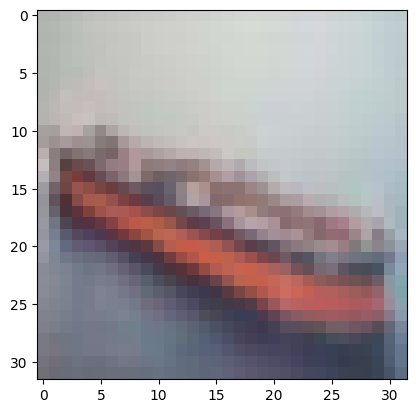

In [20]:
img=999
my_image = X_test[img]
plt.imshow(my_image)

print(f" Image {img} is {y_test[img]}")

# predicted correct
pred_ = np.argmax(vgg16.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image {img} label is {pred_}({labels[pred_]})")

 Image 7 is [6]
1/1 [==============================] - 1s 944ms/step
The model predict that image 7 label is 6(frog)


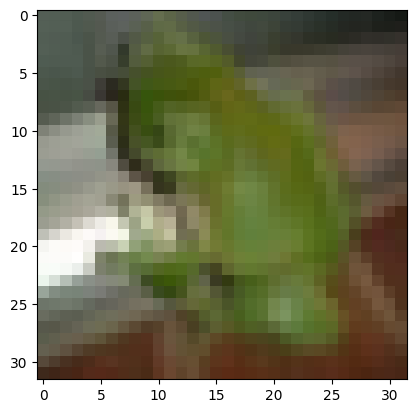

In [17]:
img=7
my_image = X_test[img]
plt.imshow(my_image)

print(f" Image {img} is {y_test[img]}")

# predicted correct
pred_ = np.argmax(vgg16.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image {img} label is {pred_}({labels[pred_]})")

 Image 2000 is [1]
1/1 [==============================] - 0s 19ms/step
The model predict that image 2000 label is 1(automobile)


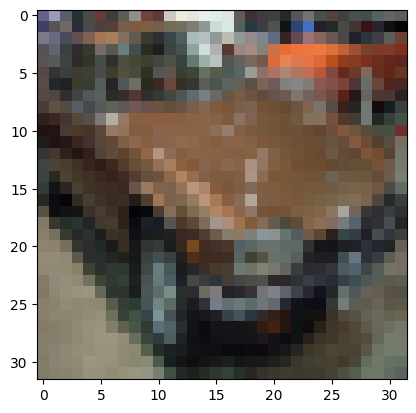

In [18]:
img=2000
my_image = X_test[img]
plt.imshow(my_image)

print(f" Image {img} is {y_test[img]}")

# predicted correct
pred_ = np.argmax(vgg16.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image {img} label is {pred_}({labels[pred_]})")

 Image 5000 is [7]
1/1 [==============================] - 0s 23ms/step
The model predict that image 5000 label is 7(horse)


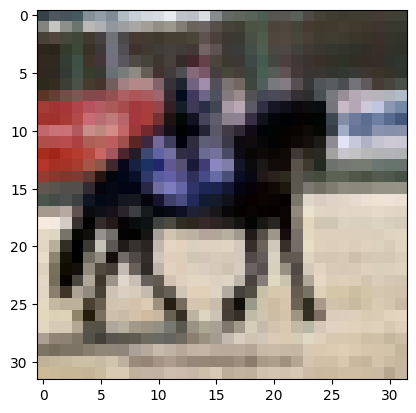

In [21]:
img=5000
my_image = X_test[img]
plt.imshow(my_image)

print(f" Image {img} is {y_test[img]}")

# predicted correct
pred_ = np.argmax(vgg16.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image {img} label is {pred_}({labels[pred_]})")

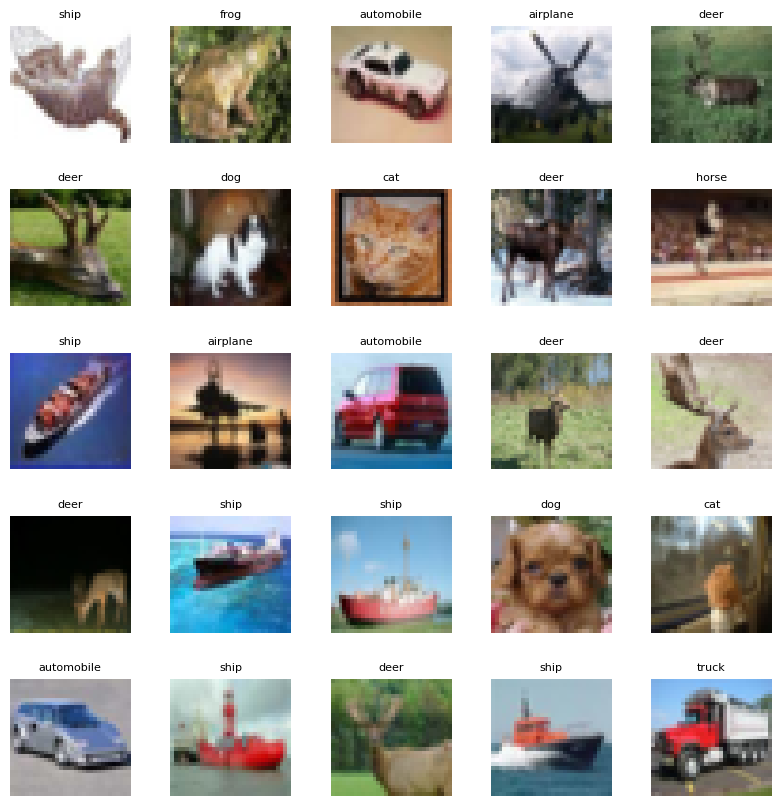

In [23]:
W_grid = 5
L_grid = 5

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel()

n_test = len(X_test)

for i in np.arange(0, W_grid * L_grid):

    index = np.random.randint(0, n_test)
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [24]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
               color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 [==============================] - 3s 8ms/step


<ipython-input-24-1a6f3c8bfb16>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})",
<ipython-input-24-1a6f3c8bfb16>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions_array, true_label = predictions_array, int(true_label[i])


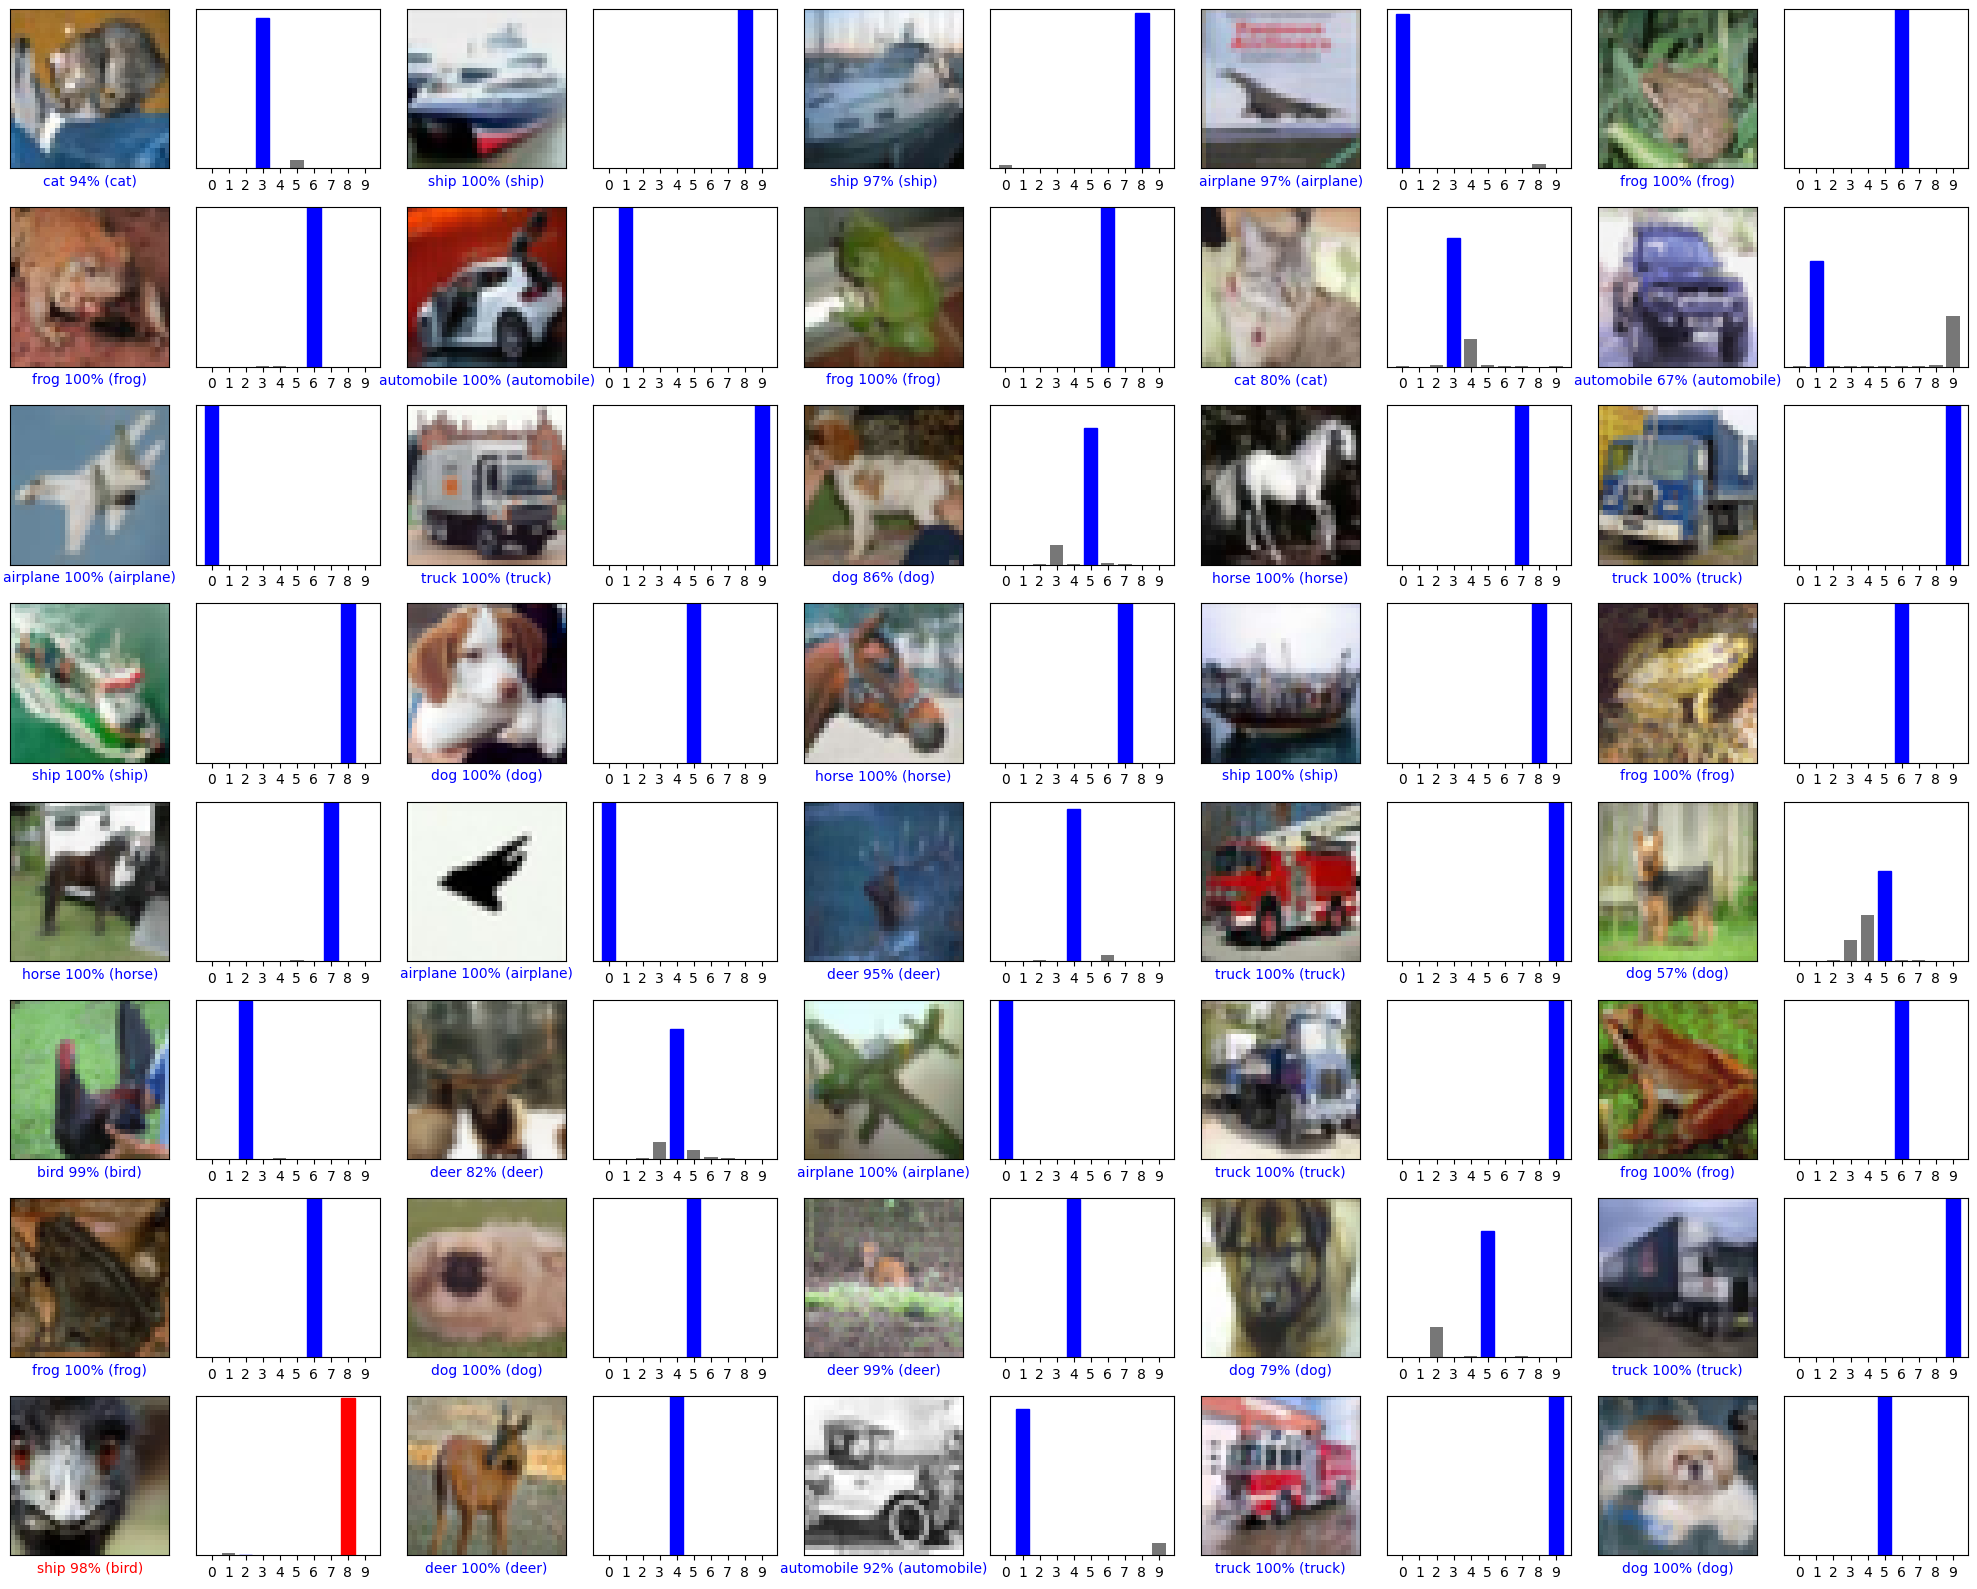

In [26]:
predictions = vgg16.predict(X_test)

num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()